In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [176]:
wine = load_wine()

kmeans = KMeans(n_clusters=3).fit(wine.data)

print(kmeans)

KMeans(n_clusters=3)


In [177]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([100,  30,  48]))

4543749.614531862
2633555.3324093386
1351749.3691428083
916379.1871539169
662950.4595267145
412303.8282508013
385420.38070080127
287715.1656534035
239704.8048452769


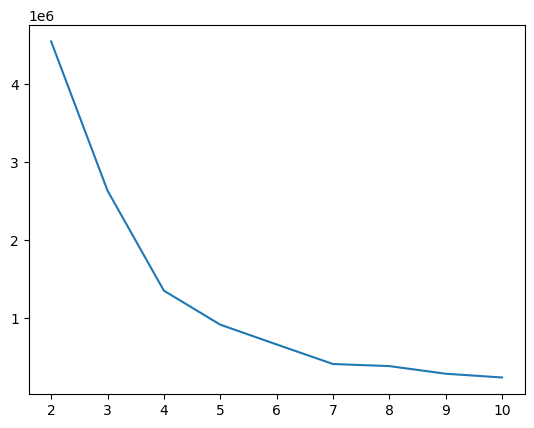

In [178]:
clustersRange = range(2, 11)

objFunc = []

for i in clustersRange:
    kmeans = KMeans(n_clusters=i).fit(wine.data)
    print(kmeans.inertia_)
    objFunc.append(kmeans.inertia_)

objFunc

plt.plot(clustersRange, objFunc)

[array([[1.36412500e+01, 1.90660714e+00, 2.42375000e+00, 1.74714286e+01,
        1.06392857e+02, 2.79053571e+00, 2.85875000e+00, 2.92857143e-01,
        1.88339286e+00, 5.56839286e+00, 1.05921429e+00, 3.04767857e+00,
        1.14642857e+03],
       [1.27065574e+01, 2.53360656e+00, 2.34024590e+00, 2.04237705e+01,
        9.66885246e+01, 2.06770492e+00, 1.64852459e+00, 3.93524590e-01,
        1.45663934e+00, 4.82385245e+00, 9.10737705e-01, 2.41155738e+00,
        5.63500000e+02]]), array([[1.38507407e+01, 1.77851852e+00, 2.48777778e+00, 1.69259259e+01,
        1.05629630e+02, 2.94148148e+00, 3.13666667e+00, 2.98888889e-01,
        2.00703704e+00, 6.27518519e+00, 1.10296296e+00, 3.00222222e+00,
        1.30877778e+03],
       [1.25985294e+01, 2.45343137e+00, 2.32186275e+00, 2.06460784e+01,
        9.36960784e+01, 2.05362745e+00, 1.64754902e+00, 3.95980392e-01,
        1.42509804e+00, 4.67333332e+00, 9.17843137e-01, 2.39480392e+00,
        5.21558824e+02],
       [1.33691837e+01, 2.4000000

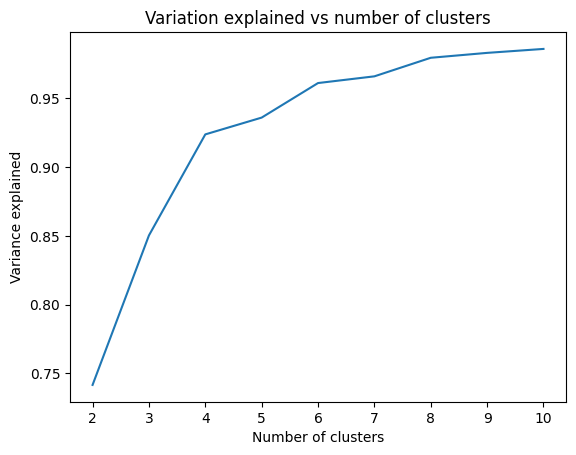

In [179]:
clustersRange = range(2, 11)

KMeanModels = [KMeans(n_clusters=i).fit(wine.data) for i in clustersRange]

centroids = [model.cluster_centers_ for model in KMeanModels]

print(centroids)

k_euclid = [cdist(wine.data, cent, 'euclidean') for cent in centroids]

dist = [np.min(ke, axis=1) for ke in k_euclid]

wcss = [sum(d**2) for d in dist]

tss = sum(pdist(wine.data)**2)/wine.data.shape[0]

bss = tss - wcss

plt.plot(clustersRange, bss/tss)

plt.xlabel('Number of clusters')

plt.ylabel('Variance explained')

plt.title('Variation explained vs number of clusters')

plt.show()

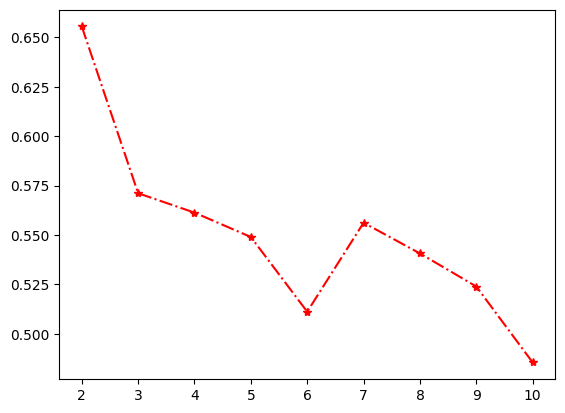

In [180]:
ss = []

k_range = range(2, 11)

k_means = [KMeans(n_clusters=k).fit(wine.data) for k in k_range]

ssscore = [silhouette_score(wine.data, model.labels_) for model in k_means]

plt.plot(k_range, ssscore, 'r*-.')

In [181]:
pca = PCA(n_components=2).fit(wine.data)

pca_trans = pca.transform(wine.data)

pca_trans_df = pd.DataFrame(pca_trans, columns=['PC1', 'PC2'])

pca.explained_variance_

# kmeans = KMeans(n_clusters=3).fit(pca_trans_df)

# kmeans_3 = KMeans(n_clusters=3).fit(wine.data)
# kmeans_3 = pd.DataFrame(kmeans_3.labels_, columns=['cluster'])
# kmeans_3 = pd.concat([wine.data, kmeans_3], axis=1)

# fig = sns.scatterplot(x='PC1', y='PC2', hue=kmeans.labels_, data=pca_trans_df)

array([99201.78951748,   172.53526648])

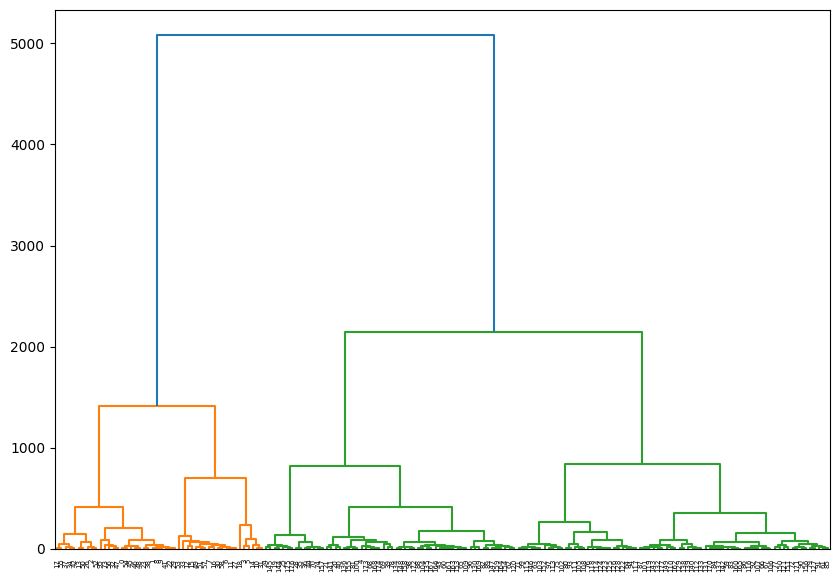

In [182]:
# Load the wine dataset
wine = load_wine()

# Convert to Pandas DataFrame
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

wine_complete = pd.concat([wine_df, pd.DataFrame(wine.target, columns=['target'])], axis=1)

fig = plt.figure(figsize=(10, 7))

dn = hierarchy.dendrogram(hierarchy.linkage(wine.data, method='ward'))

plt.show()


In [183]:
model = AgglomerativeClustering(n_clusters=3).fit(wine.data)

In [184]:
gmm = GaussianMixture(n_components=3).fit(wine.data)

labels = gmm.predict(wine.data)
wine['labels'] = labels

d0 = wine[wine['labels'] == 0]
d1 = wine[wine['labels'] == 1]
d2 = wine[wine['labels'] == 2]

TypeError: unhashable type: 'numpy.ndarray'